In [1]:
### Clustering algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/RDataAnalysis/Clustering/organics.csv')

In [4]:
df.head()

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01


In [5]:
# to check data type for each variable
# Age, Affluence grade and Loyalty card tenure are object, need to change them into integer type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Loyalty ID           22223 non-null  int64  
 1   Gender                        19711 non-null  object 
 2   Geographic Region             21758 non-null  object 
 3   Loyalty Status                22223 non-null  object 
 4   Neigborhood Cluster-55 Level  21549 non-null  float64
 5   Neighborhood Cluster-7 Level  21549 non-null  object 
 6   Television Region             21758 non-null  object 
 7   Affluence Grade               22223 non-null  object 
 8   Age                           22223 non-null  object 
 9   Frequency                     22223 non-null  int64  
 10  Frequency Percent             22223 non-null  object 
 11  Loyalty Card Tenure           22223 non-null  object 
 12  Organics Purchase Count       22223 non-null  int64  
 13  O

In [6]:
# to print missing values in dataset
df.isnull().sum()

Customer Loyalty ID                0
Gender                          2512
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                    0
Age                                0
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure                0
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

In [7]:
# Age, Affluence grade and Loyalty card tenure are object, need to change them into integer type
df['Affluence Grade'] = pd.to_numeric(df['Affluence Grade'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Loyalty Card Tenure'] = pd.to_numeric(df['Loyalty Card Tenure'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Loyalty ID           22223 non-null  int64  
 1   Gender                        19711 non-null  object 
 2   Geographic Region             21758 non-null  object 
 3   Loyalty Status                22223 non-null  object 
 4   Neigborhood Cluster-55 Level  21549 non-null  float64
 5   Neighborhood Cluster-7 Level  21549 non-null  object 
 6   Television Region             21758 non-null  object 
 7   Affluence Grade               21138 non-null  float64
 8   Age                           20715 non-null  float64
 9   Frequency                     22223 non-null  int64  
 10  Frequency Percent             22223 non-null  object 
 11  Loyalty Card Tenure           21942 non-null  float64
 12  Organics Purchase Count       22223 non-null  int64  
 13  O

In [9]:
# to print total no. of missing values in each variable
df.isnull().sum()

Customer Loyalty ID                0
Gender                          2512
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                 1085
Age                             1508
Frequency                          0
Frequency Percent                  0
Loyalty Card Tenure              281
Organics Purchase Count            0
Organics Purchase Indicator        0
Total Spend                        0
dtype: int64

In [10]:
# to check if dataset have duplicated values
duplicate = df[df.duplicated()]

In [11]:
print('Duplicated Rows :')

Duplicated Rows :


In [12]:
# to print out rows that are duplicated, there are no duplicated values in dataset
duplicate

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend


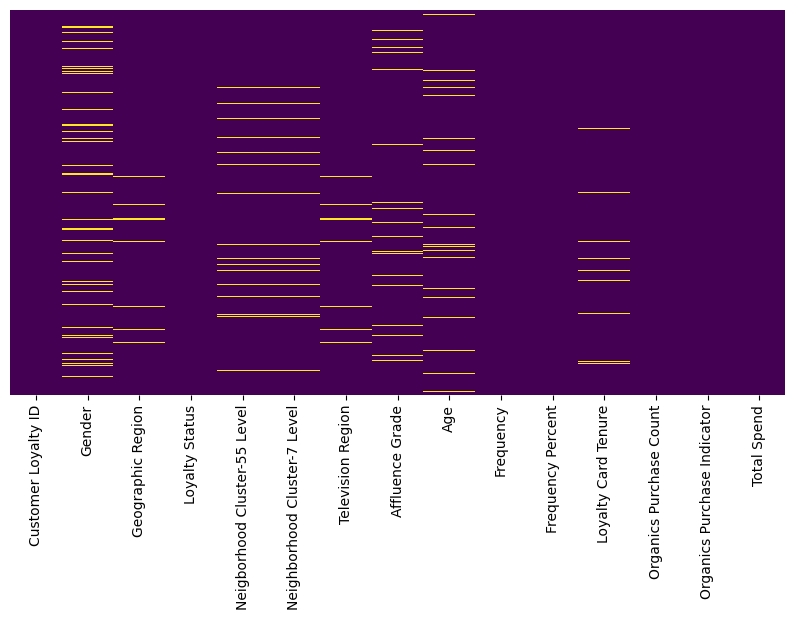

In [13]:
# to create a visual that represent the missing values
# False remove the y-axis and Clusterbar
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=df.isnull(), yticklabels= False, cbar=False ,cmap='viridis')
plt.show()

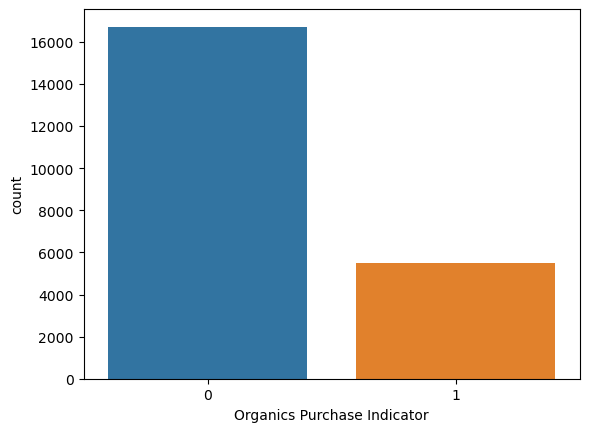

In [14]:
# a countplot to understand customers' behavior of organic food purchase
sns.countplot(data=df, x='Organics Purchase Indicator')
plt.show()

In [15]:
pd.DataFrame(df['Organics Purchase Indicator'].value_counts())

,count
Organics Purchase Indicator,
0,16718
1,5505


In [16]:
df.columns

Index(['Customer Loyalty ID', 'Gender', 'Geographic Region', 'Loyalty Status',
       'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level',
       'Television Region', 'Affluence Grade', 'Age', 'Frequency',
       'Frequency Percent', 'Loyalty Card Tenure', 'Organics Purchase Count',
       'Organics Purchase Indicator', 'Total Spend'],
      dtype='object')

In [17]:
# to select out columns for Clustering algorithm into a new dataframe
df2 = df[['Affluence Grade','Age','Loyalty Card Tenure','Organics Purchase Indicator','Total Spend']] 

In [18]:
df2.head()

,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Indicator,Total Spend
0,10.0,76.0,4.0,0,16000.00
1,4.0,49.0,5.0,0,6000.00
2,5.0,70.0,8.0,1,0.02
3,10.0,65.0,7.0,1,0.01
4,11.0,68.0,8.0,0,0.01


In [19]:
# to check for missing values in new dataframe
df2.isnull().sum()

Affluence Grade                1085
Age                            1508
Loyalty Card Tenure             281
Organics Purchase Indicator       0
Total Spend                       0
dtype: int64

In [20]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Affluence Grade,21138.0,8.711893,3.421125,0.00,6.00,8.0,11.0,34.00
Age,20715.0,53.797152,13.206048,18.00,44.00,54.0,64.0,79.00
Loyalty Card Tenure,21942.0,6.564670,4.657113,0.00,4.00,5.0,8.0,39.00
Organics Purchase Indicator,22223.0,0.247716,0.431696,0.00,0.00,0.0,0.0,1.00
Total Spend,22223.0,4420.590041,7559.047522,0.01,0.01,2000.0,6000.0,296313.85


In [21]:
# to impute missing values in 'Affluence Grade','Age','Loyalty Card Tenure' by their column medians
# using the column median values as median is less sensitive to outliers than the means

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


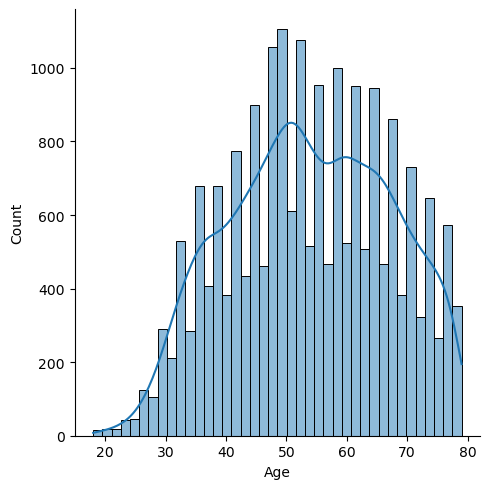

In [21]:
# EDA to see the distribution of variables containing missing values
# Age seems to be in the normal distriution graph
sns.displot(data=df2, x='Age', bins=40, kde=True)
plt.show()

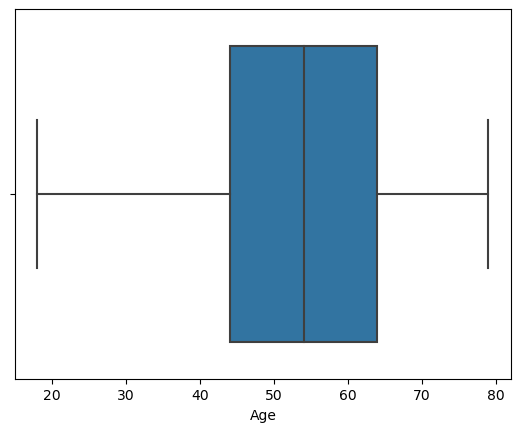

In [22]:
# the mean age of customers seems to be at 54 years
# there are no outlier values in 'Age' column
sns.boxplot(data=df2, x='Age')
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


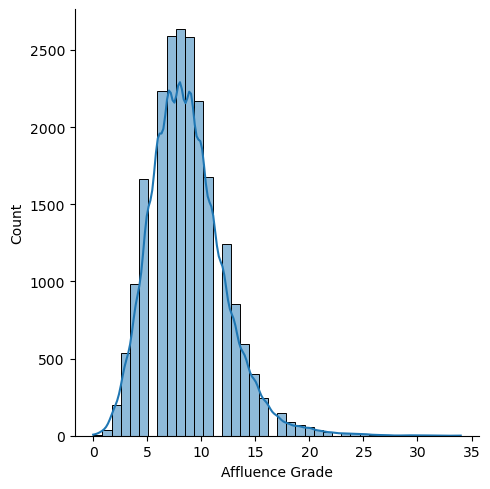

In [23]:
# distribution for Affluence Grade is skewed to the left
sns.displot(data=df2, x='Affluence Grade', bins=40, kde=True)
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


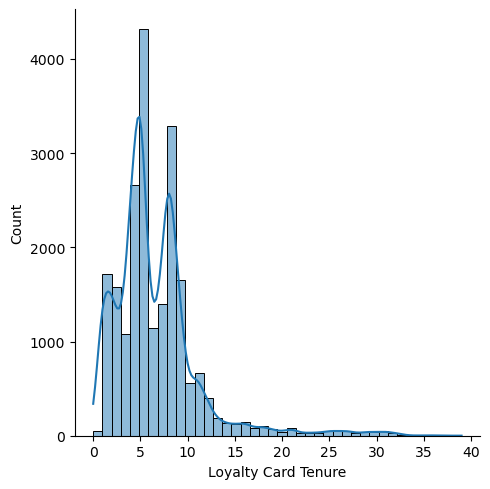

In [24]:
# distribution for Loyalty Card Tenure is skewed to the left
sns.displot(data=df2, x='Loyalty Card Tenure', bins=40, kde=True)
plt.show()

In [25]:
# to fill missing values with their column medians
df2[['Age', 'Affluence Grade','Loyalty Card Tenure']] = df2[['Age', 'Affluence Grade','Loyalty Card Tenure']].fillna(df2[['Age', 'Affluence Grade','Loyalty Card Tenure']].median())

C:\Users\miche\AppData\Local\Temp\ipykernel_2132\2935149191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Age', 'Affluence Grade','Loyalty Card Tenure']] = df2[['Age', 'Affluence Grade','Loyalty Card Tenure']].fillna(df2[['Age', 'Affluence Grade','Loyalty Card Tenure']].median())


In [26]:
# after replace missing values with respective column median, there are no missing values
df2.isnull().sum()

Affluence Grade                0
Age                            0
Loyalty Card Tenure            0
Organics Purchase Indicator    0
Total Spend                    0
dtype: int64

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


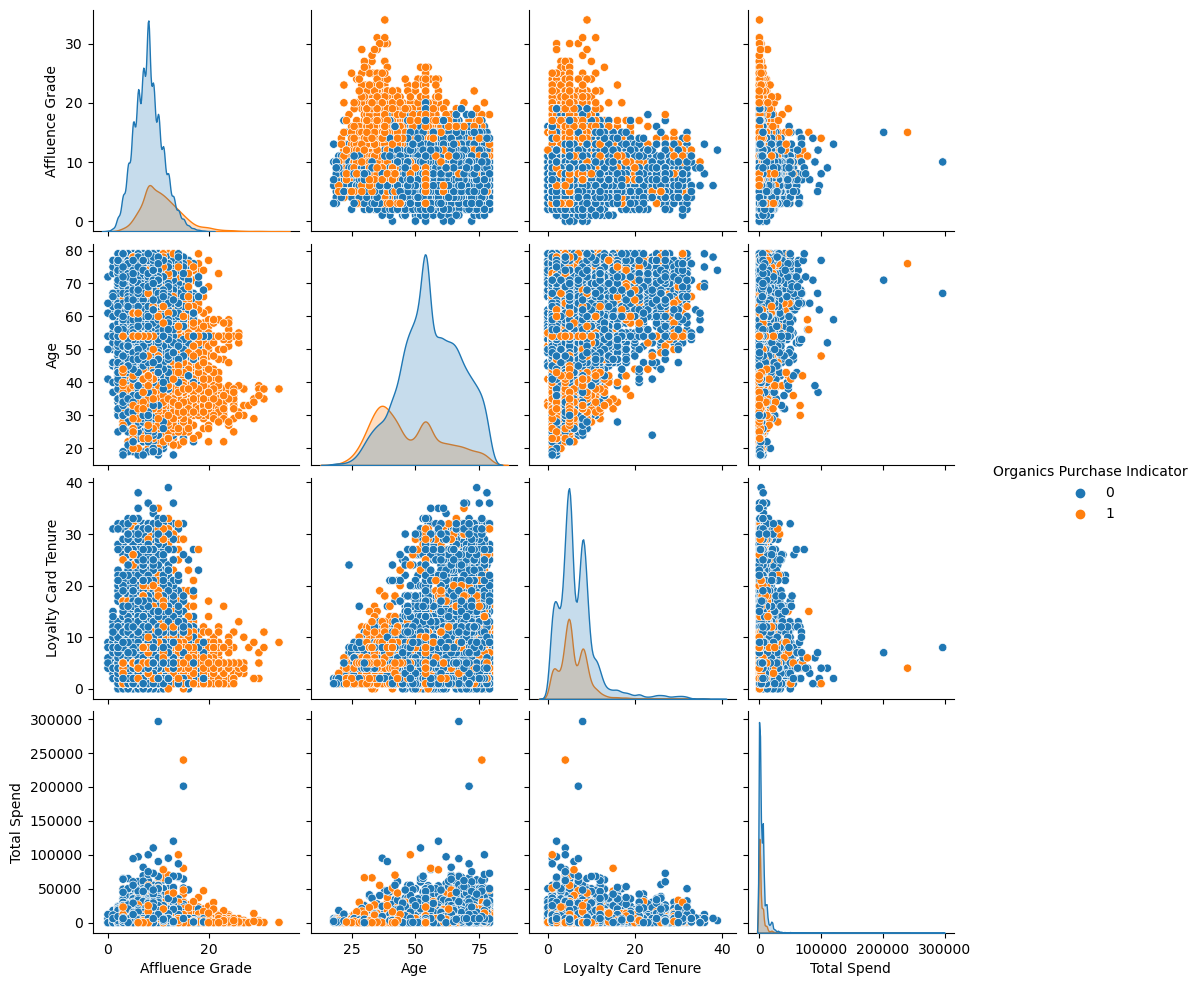

In [27]:
sns.pairplot(data=df2, hue ='Organics Purchase Indicator')
plt.show()

In [28]:
df2.corr()

,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Indicator,Total Spend
Affluence Grade,1.000000,-0.129452,-0.029685,0.349522,-0.018650
Age,-0.129452,1.000000,0.200244,-0.291438,0.262032
Loyalty Card Tenure,-0.029685,0.200244,1.000000,-0.053880,0.033013
Organics Purchase Indicator,0.349522,-0.291438,-0.053880,1.000000,-0.079920
Total Spend,-0.018650,0.262032,0.033013,-0.079920,1.000000


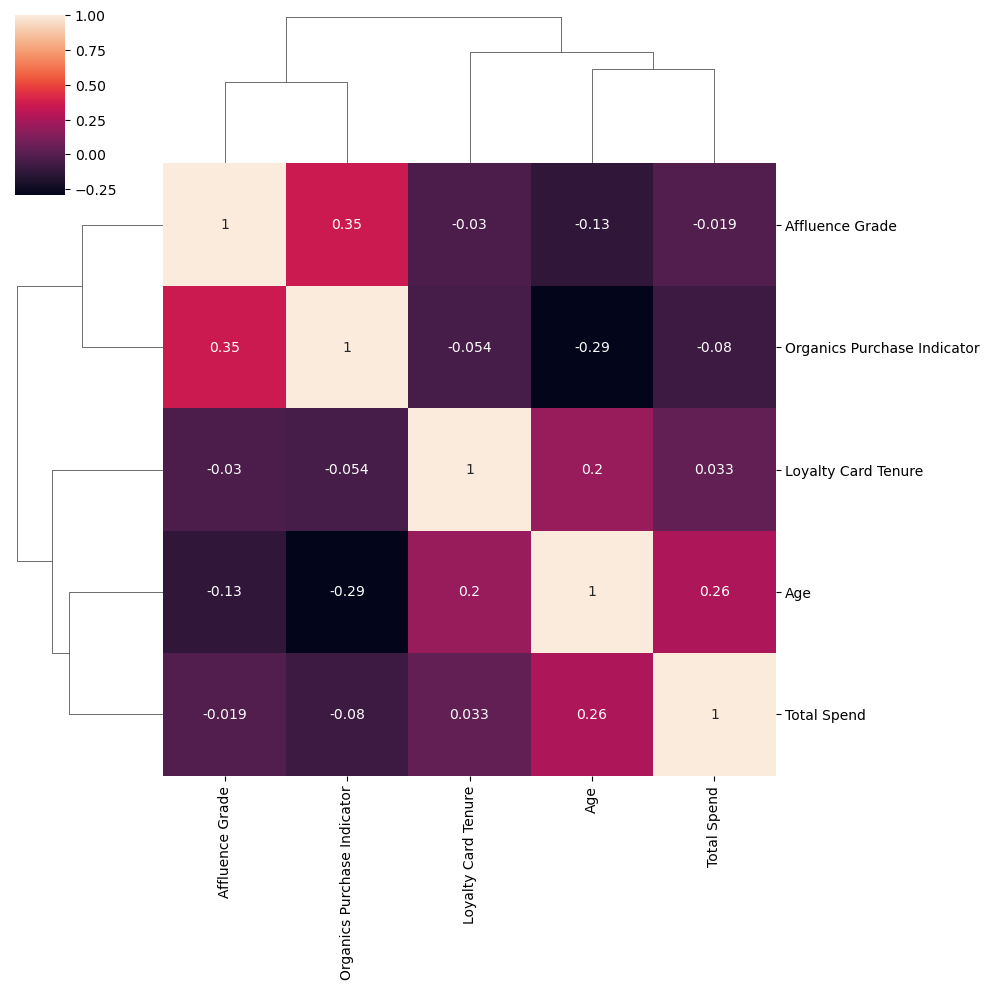

In [29]:
# to plot a clustermap for all numeric values 
sns.clustermap(data=df2.corr(), annot=True)
plt.show()

In [30]:
# to print values correlated with Total spend
# Age shows the highest correlation towards Total amount spent in the supermarket
df2.corr()['Total Spend']

Affluence Grade               -0.018650
Age                            0.262032
Loyalty Card Tenure            0.033013
Organics Purchase Indicator   -0.079920
Total Spend                    1.000000
Name: Total Spend, dtype: float64

In [32]:
# to scale the whole dataset before DBSCAN clustering
#from sklearn.preprocessing import StandardScaler

In [33]:
#scaler = StandardScaler()

In [34]:
#scaled_df = scaler.fit_transform(df2)

In [35]:
#scaled_df

In [36]:
#from sklearn.cluster import DBSCAN

In [37]:
# to keep track of the outlier percentage using the 'for' Loop
#outlier_percent = []

#for eps in np.linspace(0.001,3,5): # (0.001,3,50) are the eps values for testing the correct number for DBSCAN algorithm
    
#    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_df.shape[1])
#    dbscan.fit(scaled_df)
    
#   perc_outliers = 100*np.sum(dbscan.labels_==-1) / len(dbscan.labels_) # to highlight Outliers in the dataset
    
#    outlier_percent.append(perc_outliers)

In [38]:
#sns.lineplot(x=np.linspace(0.001,3,5), y=outlier_percent)
#plt.ylabel('% of points classified as Outliers')
#plt.show()

In [39]:
#dbscan = DBSCAN(eps=2, min_samples=scaled_df.shape[1])

In [40]:
# to fit the DBSCAN modelinto the scaled_df
#dbscan.fit(scaled_df)

In [41]:
#pd.DataFrame(dbscan.labels_)

In [42]:
#sns.scatterplot(data=df, x='Age', y='Total Spend', hue=dbscan.labels_, palette='Set1')
#plt.show()

In [43]:
#sns.scatterplot(data=df, x='Organics Purchase Indicator', y='Total Spend', hue=dbscan.labels_, palette='Set1')
#plt.show()

In [44]:
# to import MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler

In [45]:
#scaler = MinMaxScaler()

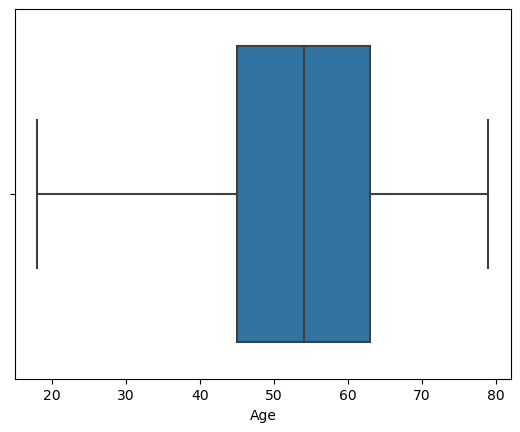

In [31]:
sns.boxplot(data=df2, x='Age')
plt.show()

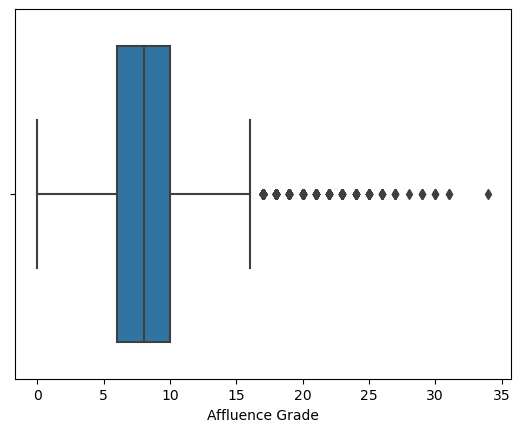

In [32]:
# there are significant number outliers from point 16 onwards
sns.boxplot(data=df2, x='Affluence Grade')
plt.show()

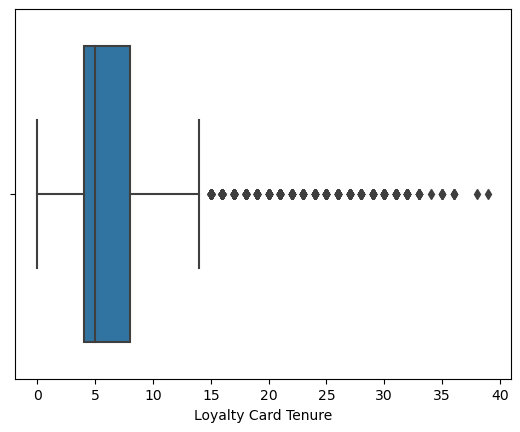

In [33]:
# there is significant number of outliers from point 14 onwards
sns.boxplot(data=df2, x='Loyalty Card Tenure')
plt.show()

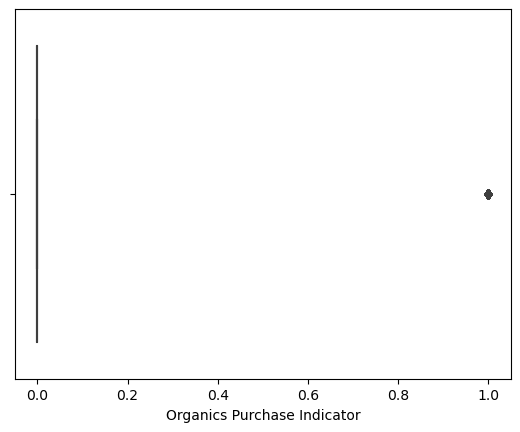

In [49]:
# there is no outliers in Organics Purchase Indicator column
sns.boxplot(data=df2, x='Organics Purchase Indicator')
plt.show()

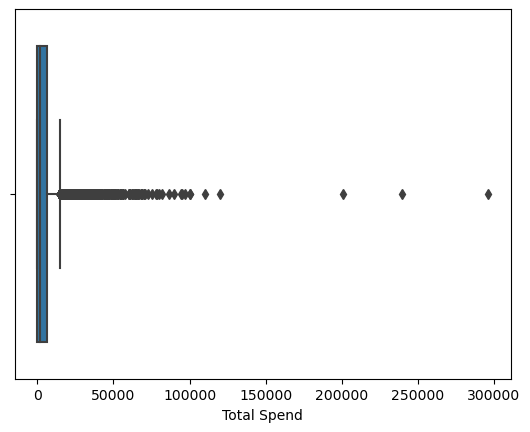

In [34]:
# there are significant number of outliers in the Total Spend column
sns.boxplot(data=df2, x='Total Spend')
plt.show()

In [35]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Affluence Grade,22223.0,8.677136,3.340086,0.00,6.00,8.0,10.0,34.00
Age,22223.0,53.810917,12.750193,18.00,45.00,54.0,63.0,79.00
Loyalty Card Tenure,22223.0,6.544886,4.630876,0.00,4.00,5.0,8.0,39.00
Organics Purchase Indicator,22223.0,0.247716,0.431696,0.00,0.00,0.0,0.0,1.00
Total Spend,22223.0,4420.590041,7559.047522,0.01,0.01,2000.0,6000.0,296313.85


In [52]:
# K-means clustering is sensitive towards outlier values, to remove outliers from dataset
# to remove outliers using the Interquartile range method
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

In [36]:
# to remove outliers (Affluence Grade,Loyalty Card Tenure,Total Spend) using the Interquartile range method
Q1_25 = df2['Affluence Grade'].quantile(0.25)
Q1_25

6.0

In [37]:
Q3_75 = df2['Affluence Grade'].quantile(0.75)
Q3_75

10.0

In [38]:
# Interquartile range for Affluence Grade
# IQR = Quartile 3(75) - Quartile 1(25) 
IQR = Q3_75 - Q1_25
IQR

4.0

In [39]:
# Affluence Grade upper limits
AF_upper_limit = 10 + 1.5 * 4
AF_upper_limit

16.0

In [40]:
# Affluence Grade lower limits
AF_lower_limit = 6 - 1.5 * 4
AF_lower_limit

0.0

In [41]:
# Finding the upper limit outliers
AF_upper_array = df2[df2['Affluence Grade'] > AF_upper_limit]

In [42]:
# Finding the lower limit outliers
AF_lower_array = df2[df2['Affluence Grade'] > AF_lower_limit]

In [44]:
# to remove the outliers in Affluence Grade
new_df = df2[(df2['Affluence Grade'] < AF_upper_limit) & (df2['Affluence Grade'] > AF_lower_limit)]
new_df.shape

(21481, 5)

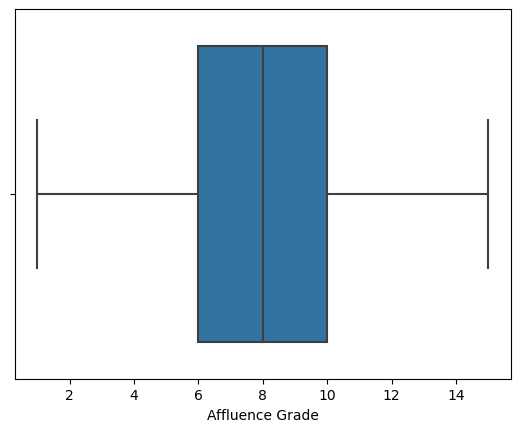

In [45]:
# boxplot for new Affluence Grade
sns.boxplot(data=new_df, x='Affluence Grade')
plt.show()

In [46]:
# to remove outliers Loyalty Card Tenure
Q1_25_Ten = df2['Loyalty Card Tenure'].quantile(0.25)
Q1_25_Ten

4.0

In [47]:
Q3_75_Ten = df2['Loyalty Card Tenure'].quantile(0.75)
Q3_75_Ten

8.0

In [48]:
# Interquartile range for Affluence Grade
# IQR = Quartile 3(75) - Quartile 1(25) 
IQR_Ten = Q3_75_Ten - Q1_25_Ten
IQR_Ten

4.0

In [49]:
# Loyalty Card Tenure upper limits
Ten_upper_limit = 8 + 1.5 * 4
Ten_upper_limit

14.0

In [50]:
# Loyalty Card Tenure lower limits
Ten_lower_limit = 4 - 1.5 * 4
Ten_lower_limit

-2.0

In [53]:
# Finding the upper limit outliers
Ten_upper_array = df2[df2['Loyalty Card Tenure'] > Ten_upper_limit]

In [54]:
# Finding the lower limit outliers
Ten_lower_array = df2[df2['Loyalty Card Tenure'] > Ten_lower_limit]

In [55]:
# to remove the outliers in Affluence Grade
new_df = df2[(df2['Loyalty Card Tenure'] < AF_upper_limit) & (df2['Loyalty Card Tenure'] > Ten_lower_limit)]
new_df.shape

(21248, 5)

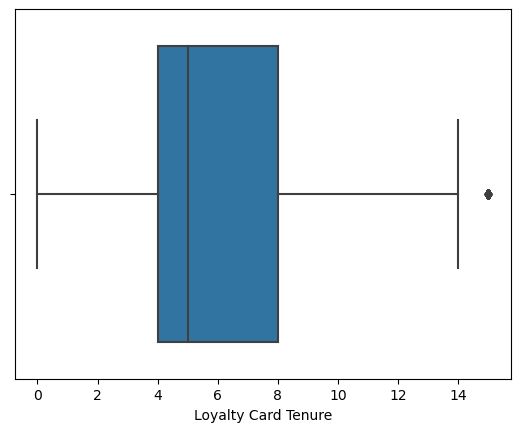

In [57]:
# boxplot for new Affluence Grade
sns.boxplot(data=new_df, x='Loyalty Card Tenure')
plt.show()

In [58]:
# to remove Total Spend
Q1_25_Spend = df2['Total Spend'].quantile(0.25)
Q1_25_Spend

0.01

In [59]:
Q3_75_Spend = df2['Total Spend'].quantile(0.75)
Q3_75_Spend

6000.0

In [60]:
# Interquartile range for Affluence Grade
# IQR = Quartile 3(75) - Quartile 1(25) 
IQR_Spend = Q3_75_Spend - Q1_25_Spend
IQR_Spend

5999.99

In [61]:
# Total upper limits
Spend_upper_limit = 6000 + 1.5 * 5999.99
Spend_upper_limit

14999.985

In [62]:
# Total Tenure lower limits
Spend_lower_limit = 0.01 - 1.5 * 4
Spend_lower_limit

-5.99

In [63]:
# Finding the upper limit outliers
Spend_upper_array = df2[df2['Total Spend'] > Spend_upper_limit]

In [64]:
# Finding the lower limit outliers
Spend_lower_array = df2[df2['Total Spend'] > Spend_lower_limit]

In [65]:
# to remove the outliers in Affluence Grade
new_df = df2[(df2['Total Spend'] < Spend_upper_limit) & (df2['Total Spend'] > Spend_lower_limit)]
new_df.shape

(20765, 5)

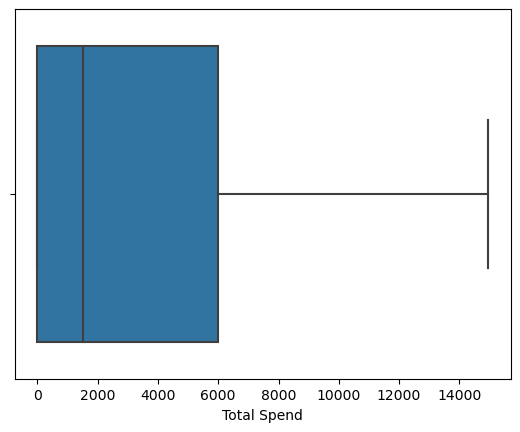

In [66]:
# there are no more outlier values in total spend column
sns.boxplot(data=new_df, x='Total Spend')
plt.show()

In [67]:
new_df.head()

,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Indicator,Total Spend
1,4.0,49.0,5.0,0,6000.00
2,5.0,70.0,8.0,1,0.02
3,10.0,65.0,7.0,1,0.01
4,11.0,68.0,8.0,0,0.01
6,11.0,74.0,8.0,0,0.01


In [68]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Affluence Grade,20765.0,8.690537,3.360761,0.00,6.00,8.0,10.0,34.00
Age,20765.0,53.276475,12.713160,18.00,44.00,54.0,63.0,79.00
Loyalty Card Tenure,20765.0,6.511919,4.554547,0.00,4.00,5.0,8.0,39.00
Organics Purchase Indicator,20765.0,0.253889,0.435245,0.00,0.00,0.0,1.0,1.00
Total Spend,20765.0,2984.740643,3519.671187,0.01,0.01,1500.0,6000.0,14961.52


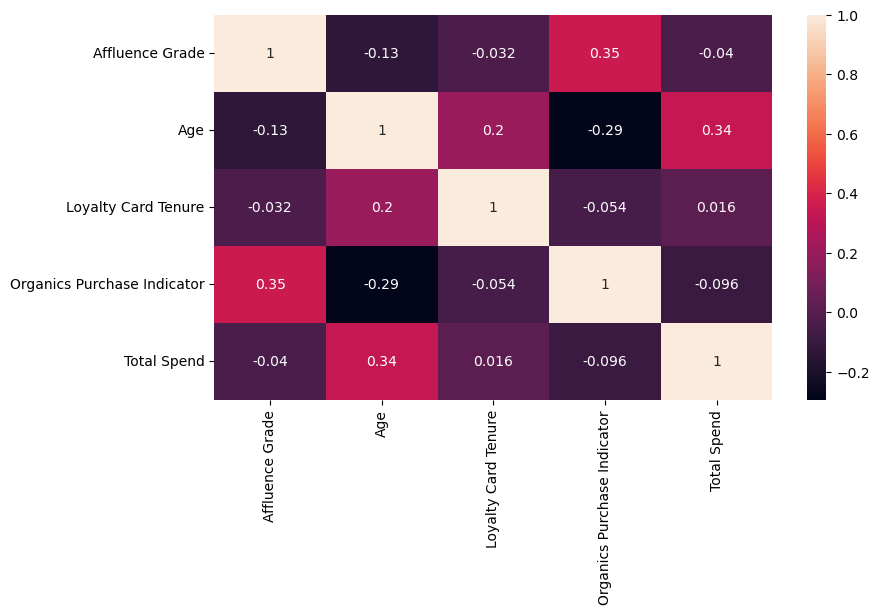

In [69]:
plt.figure(figsize=(9,5), dpi=100)
sns.heatmap(new_df.corr(), annot=True)
plt.show()

In [70]:
# after removing outlier values, Age shows the strongest correlation to Total amount spent in Supermarket
new_df.corr()['Total Spend']

Affluence Grade               -0.039622
Age                            0.335755
Loyalty Card Tenure            0.016334
Organics Purchase Indicator   -0.096047
Total Spend                    1.000000
Name: Total Spend, dtype: float64

In [71]:
# import Scaler metrics
from sklearn.preprocessing import StandardScaler

In [72]:
# to create the scaler object
scaler = StandardScaler()

In [73]:
scaled_df = scaler.fit_transform(new_df)

In [74]:
scaled_df

array([[-1.39571083, -0.33638984, -0.33196617, -0.58333756,  0.85670843],
       [-1.09815197,  1.3154816 ,  0.32673211,  1.71427329, -0.84803164],
       [ 0.38964233,  0.92217887,  0.10716602,  1.71427329, -0.84803448],
       ...,
       [ 0.09208347,  1.3154816 , -0.33196617, -0.58333756,  0.85670843],
       [ 0.68720119,  1.00083942, -0.33196617, -0.58333756,  0.57258414],
       [-1.69326969,  1.70878432, -0.99066444, -0.58333756,  0.85670843]])

In [75]:
# to import KMeans algorithm
from sklearn.cluster import KMeans

In [76]:
# using the 'for' loop for sum of square distance Jose portilla method to find optimal value of K
ssd = []

for k in range(1,15): # to find value of K in the range of 2 to 10
    
    model= KMeans(n_clusters=k)
    model.fit(scaled_df)
    
    # to append the sum of square distances of samples to their closest cluster centre
    ssd.append(model.inertia_)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [77]:
ssd

[103825.00000000003,
 78415.17644369029,
 64097.51771524253,
 53388.31695560398,
 48409.67338315549,
 44031.05129312698,
 40576.83658705841,
 37006.84744084449,
 34608.56345711091,
 32909.799057964185,
 31272.13069460782,
 29845.86881402605,
 28620.48175209571,
 27498.66758492458]

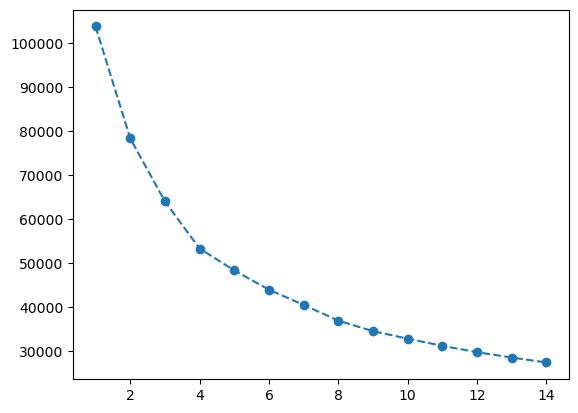

In [78]:
# to plot the range of K values from ssd loop
# K values specified on the X-axis
# from the plot, when K = 4, there is an elbow
plt.plot(range(1,15),ssd,'o--')
plt.show()

In [79]:
# to convert ssd into a series
pd.Series(ssd)

0     103825.000000
1      78415.176444
2      64097.517715
3      53388.316956
4      48409.673383
5      44031.051293
6      40576.836587
7      37006.847441
8      34608.563457
9      32909.799058
10     31272.130695
11     29845.868814
12     28620.481752
13     27498.667585
dtype: float64

In [80]:
# to check the differences between each K values at each subsequent points, that represents the plot above
# the ssd distance is when k=4
pd.Series(ssd).diff()

0              NaN
1    -25409.823556
2    -14317.658728
3    -10709.200760
4     -4978.643572
5     -4378.622090
6     -3454.214706
7     -3569.989146
8     -2398.283984
9     -1698.764399
10    -1637.668363
11    -1426.261881
12    -1225.387062
13    -1121.814167
dtype: float64

In [81]:
# to find the optimal K Value to cluster the data using the Elbow Method
wcss = [] 

for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(scaled_df) 
    wcss.append(kmeans.inertia_)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [82]:
wcss

[103825.00000000003,
 78415.1290343579,
 64097.34258227605,
 53388.23117873592,
 48411.44917775071,
 44034.310517497106,
 40442.33751460644,
 37008.89558407266,
 34608.64201028431,
 32909.81254190037,
 31271.908262738132,
 29811.319224891868,
 28570.819756512432,
 27499.251354688233,
 26553.35266876253]

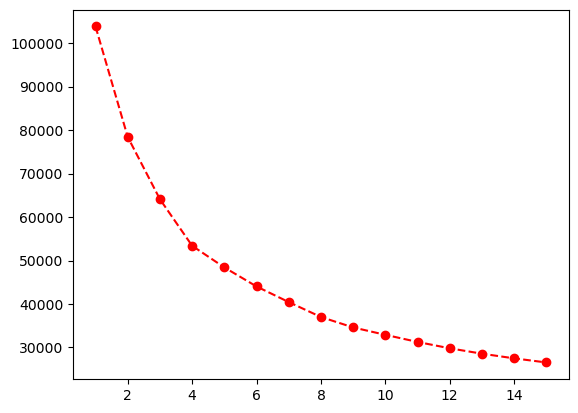

In [84]:
# when K = 4
plt.plot(range(1,16),wcss,'o--', color='r')
plt.show()

In [85]:
# to convert wcss into a series using the Elbow method
pd.Series(wcss)

0     103825.000000
1      78415.129034
2      64097.342582
3      53388.231179
4      48411.449178
5      44034.310517
6      40442.337515
7      37008.895584
8      34608.642010
9      32909.812542
10     31271.908263
11     29811.319225
12     28570.819757
13     27499.251355
14     26553.352669
dtype: float64

In [86]:
# to check the differences between each K values at each subsequent points, that represents the plot above
# at when k=4, is the elbow
pd.Series(wcss).diff()

0              NaN
1    -25409.870966
2    -14317.786452
3    -10709.111404
4     -4976.782001
5     -4377.138660
6     -3591.973003
7     -3433.441931
8     -2400.253574
9     -1698.829468
10    -1637.904279
11    -1460.589038
12    -1240.499468
13    -1071.568402
14     -945.898686
dtype: float64

In [87]:
# When K = 4
KM_model = KMeans(n_clusters=4)

In [88]:
cluster_labels = KM_model.fit_predict(scaled_df)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [89]:
cluster_labels

array([1, 2, 2, ..., 1, 1, 1])

In [90]:
new_df['Cluster'] = cluster_labels

C:\Users\miche\AppData\Local\Temp\ipykernel_2132\335636760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels


In [91]:
new_df

,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Indicator,Total Spend,Cluster
1,4.0,49.0,5.0,0,6000.00,1
2,5.0,70.0,8.0,1,0.02,2
3,10.0,65.0,7.0,1,0.01,2
4,11.0,68.0,8.0,0,0.01,0
6,11.0,74.0,8.0,0,0.01,0
...,...,...,...,...,...,...
22218,13.0,65.0,5.0,0,1500.00,0
22219,15.0,73.0,12.0,0,6053.06,1
22220,9.0,70.0,5.0,0,6000.00,1
22221,11.0,66.0,5.0,0,5000.00,1


In [97]:
new_df['Cluster'].unique()

array([1, 2, 0, 3])

In [98]:
new_df.corr()['Cluster']

Affluence Grade                0.241180
Age                            0.046037
Loyalty Card Tenure            0.336613
Organics Purchase Indicator    0.667662
Total Spend                    0.258445
Cluster                        1.000000
Name: Cluster, dtype: float64

In [99]:
# to remove the 'Cluster' column using [-1]
new_df.corr()['Cluster'].iloc[:-1]

Affluence Grade                0.241180
Age                            0.046037
Loyalty Card Tenure            0.336613
Organics Purchase Indicator    0.667662
Total Spend                    0.258445
Name: Cluster, dtype: float64

In [100]:
# to sort values in Ascending order
new_df.corr()['Cluster'].iloc[:-1].sort_values()

Age                            0.046037
Affluence Grade                0.241180
Total Spend                    0.258445
Loyalty Card Tenure            0.336613
Organics Purchase Indicator    0.667662
Name: Cluster, dtype: float64

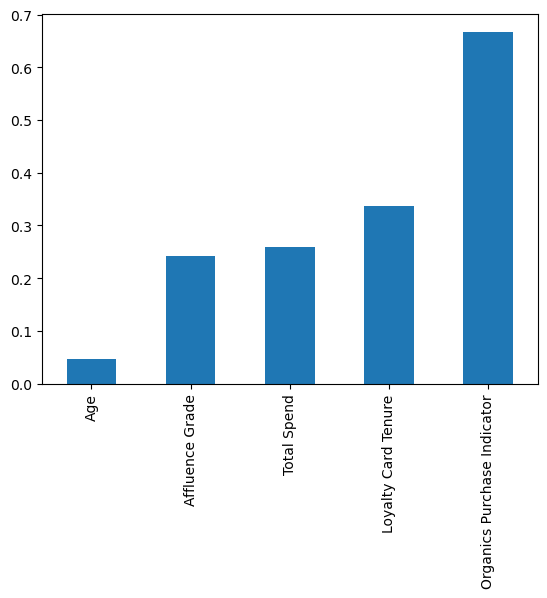

In [96]:
# to visualise strength of correlation through bar plots
# to understand which features in the dataset is important in Cluster assignment
# Loyalty card tenure and Organics Purchase Indicator is important in understanding cluster assignment
new_df.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.show()

In [115]:
# using the average silhouetter score method to find optimal value of k
#from sklearn.metrics import silhouette_score